<a href="https://colab.research.google.com/github/Eugenia27/BKP/blob/master/Copia_de_Cuando_Llueve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importacion de librerias

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.plotly as plo
import plotly.graph_objs as go
from scipy import stats


## Lectura de datos

In [0]:
lluvias = pd.read_csv("https://raw.githubusercontent.com/lprone/cuandoLlueve/master/Analisis%20y%20visualizacion/rain.csv", parse_dates = True, index_col="date" )

## Previsualización de datos

In [121]:
lluvias.rain.describe()

count    15034.000000
mean         3.331914
std         11.451975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        220.000000
Name: rain, dtype: float64

In [0]:
lluvias2 = lluvias[lluvias.rain > 0]

In [123]:
lluvias2.rain.describe()

count    2459.000000
mean       20.370882
std        21.327274
min         1.000000
25%         5.000000
50%        13.000000
75%        28.000000
max       220.000000
Name: rain, dtype: float64

In [124]:
lluvias.head()

,rain
date,
1978-01-01,0
1978-01-02,0
1978-01-03,0
1978-01-04,0
1978-01-05,0


## Grafico de datos

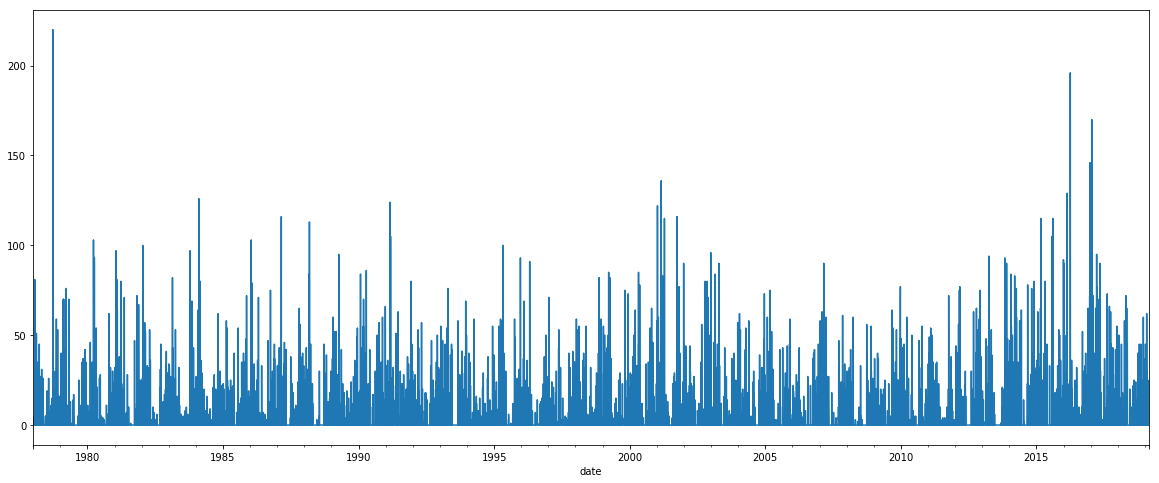

In [125]:
lluvias.rain.plot(figsize=(20,8))

## Ejercicios

Ej 1) 
Realizar analisis descriptivo de los datos. Describir variables, calcular estadísticos que se consideren apropiados,etc

Ej 2) 
Graficar variables

Ej 3)
Realizar test de normalidad

Ej 4) 
Realizar analisis de correlacion e independencia entre variables

Ej 5)
Elaborar conclusiones a partir de los resultados obtenidos en los puntos anteriores

In [0]:
import datetime as dt

In [0]:
lluvias['mes'] = lluvias.index.month
lluvias['año'] = lluvias.index.year
lluvias['mesHid'] = (lluvias.index.month+5)%12+1
lluvias['anoHid'] = (lluvias.index + dt.timedelta(days=181))

In [0]:
#lluvias[['mesHid','anoHid']]

In [129]:
lluvias[lluvias.rain.isna()==True]

,rain,mes,año,mesHid,anoHid
date,,,,,


In [0]:
dict_estaciones={
  1 : 1,
  2 : 1,
  3 : 2,
  4 : 2,
  5 : 2,
  6 : 3,
  7 : 3,
  8 : 3,
  9 : 4,
  10: 4,
  11: 4,
  12: 1}


In [0]:
lluvias['estacion'] = lluvias.mes.map(dict_estaciones)

In [0]:
lluvias2000 = lluvias[lluvias.año==2000]

In [0]:
lluvias2000_mes = lluvias[lluvias.año==2000].groupby('mes').rain.sum()
lluvias2000_est = lluvias[lluvias.año==2000].groupby('estacion').rain.sum()

In [0]:
def plotcxaños(_año,_xaños,_leg_bool):
  delta=0
  for i in range(_xaños):
    año=_año+i
    lluvias_mes = lluvias[lluvias.año==año].groupby('mes').rain.sum()
    delta+=0.04
    color = (1-delta,0.+delta,0+delta)
    plt.plot(lluvias_mes.index,lluvias_mes.values,marker='.',color=color,label=str(año))
    
  plt.ylim(0,400)
  if _leg_bool==True:
      plt.legend(bbox_to_anchor=(1.05, 0.9))

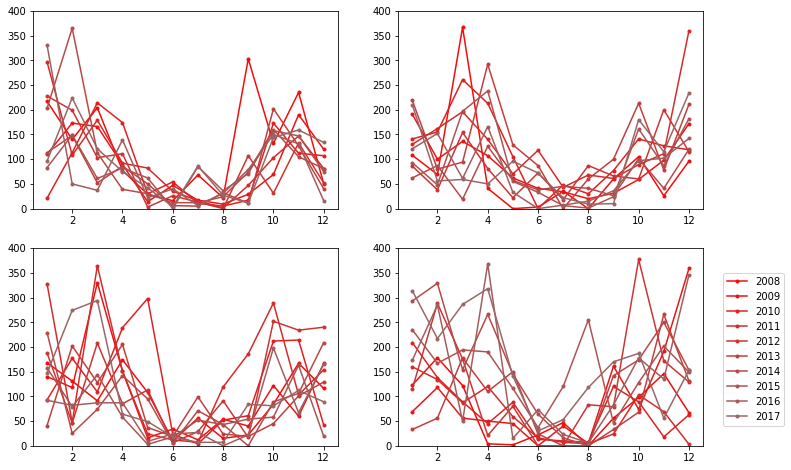

In [135]:
fig = plt.figure(figsize=(12,8))
ax=fig.add_subplot(221)
plotcxaños(1978,10,False)
ax=fig.add_subplot(222)
plotcxaños(1988,10,False)
ax=fig.add_subplot(223)
plotcxaños(1998,10,False)
ax=fig.add_subplot(224)
plotcxaños(2008,10,True)

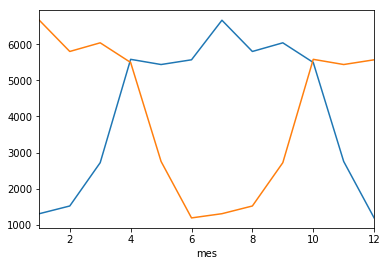

In [136]:
lluvias.groupby('mesHid').rain.sum().plot()
lluvias.groupby('mes').rain.sum().plot()

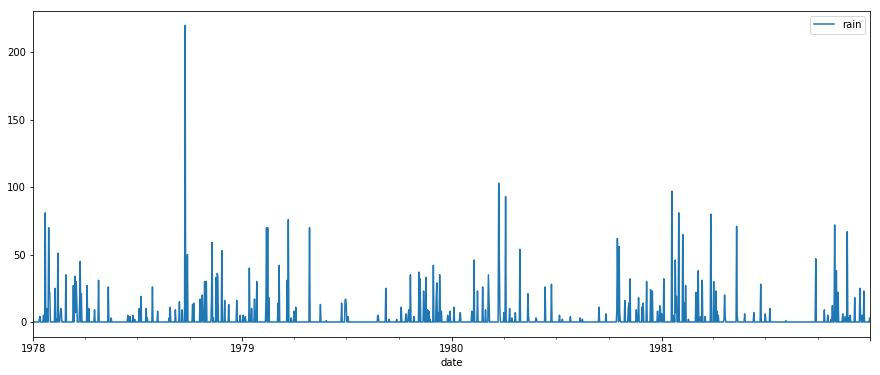

In [137]:
lluvias[['rain']][lluvias.index.year<1982].plot(figsize=(15,6))

In [0]:

def grupos(_xaños,_año):
  paraMedianas = []
  for i in range(_xaños):
    año=_año+i
    lluvias_mes = lluvias[lluvias.año==año].groupby('mes').rain.sum()
    paraMedianas.append(lluvias_mes.values)
    
  return paraMedianas

In [0]:
xaños = 10
año   = 1978
medianas = grupos(xaños,año)

In [0]:
medianasMensual = pd.pivot_table(lluvias[lluvias.rain!=0], values='rain', index=['año'],columns=['mesHid'], aggfunc=np.median)

In [0]:
sumas = pd.pivot_table(lluvias, values='rain', index=['año'],columns=['mes'], aggfunc=np.sum,margins=True)

In [182]:
sumas

mes,1,2,3,4,5,6,7,8,9,10,11,12,All
año,,,,,,,,,,,,,
1978,217.0,140.0,204.0,77.0,29.0,16.0,68.0,22.0,303.0,132.0,235.0,50.0,1493
1979,110.0,173.0,166.0,89.0,14.0,47.0,17.0,9.0,29.0,69.0,190.0,120.0,1033
1980,21.0,113.0,214.0,174.0,30.0,54.0,11.0,5.0,17.0,173.0,112.0,107.0,1031
1981,297.0,108.0,179.0,92.0,82.0,35.0,16.0,1.0,47.0,103.0,147.0,81.0,1188
1982,228.0,199.0,103.0,111.0,3.0,26.0,13.0,0.0,107.0,31.0,133.0,52.0,1006
1983,113.0,148.0,52.0,86.0,50.0,6.0,5.0,32.0,11.0,202.0,127.0,40.0,872
1984,203.0,365.0,113.0,39.0,30.0,12.0,12.0,24.0,74.0,160.0,105.0,81.0,1218
1985,83.0,149.0,61.0,82.0,62.0,0.0,85.0,36.0,71.0,158.0,147.0,75.0,1009
1986,331.0,50.0,37.0,139.0,22.0,40.0,6.0,31.0,79.0,150.0,131.0,16.0,1032


In [0]:
sumas_short = sumas.drop(['All'], axis=1)

In [0]:
sumas_short= sumas_short.drop([2019,'All'], axis=0)

In [0]:
acumuladas = sumas.All.values[:-1]

(array([ 1.,  1., 11., 17.,  5.,  4.,  3.]),
 array([ 271.        ,  524.14285714,  777.28571429, 1030.42857143,
        1283.57142857, 1536.71428571, 1789.85714286, 2043.        ]),
 <a list of 7 Patch objects>)

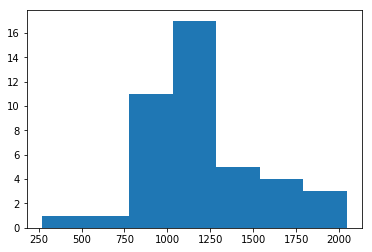

In [145]:
plt.hist(acumuladas,bins=7)        

In [0]:
sumas_stats = sumas_short.describe()
sumas_stats.loc['bigInf'] = sumas_stats.loc['25%']-(sumas_stats.loc['75%']-sumas_stats.loc['25%'])*1.5
sumas_stats.loc['bigSup'] = sumas_stats.loc['75%']+(sumas_stats.loc['75%']-sumas_stats.loc['25%'])*1.5

In [196]:
sumas_stats

mes,1,2,3,4,5,6,7,8,9,10,11,12
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,156.926829,140.658537,147.390244,134.097561,67.146341,28.951220,31.804878,37.024390,66.317073,136.219512,132.707317,135.902439
std,81.749125,82.812925,90.112951,84.687899,58.814352,26.821588,29.552681,47.985669,58.956526,70.030533,60.129961,84.908423
min,21.000000,25.000000,19.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,18.000000,3.000000
25%,93.000000,79.000000,87.000000,77.000000,24.000000,10.000000,7.000000,5.000000,24.000000,89.000000,101.000000,81.000000
50%,141.000000,134.000000,128.000000,111.000000,55.000000,23.000000,22.000000,24.000000,56.000000,128.000000,127.000000,129.000000
75%,210.000000,177.000000,196.000000,174.000000,96.000000,38.000000,47.000000,52.000000,79.000000,174.000000,167.000000,167.000000
max,331.000000,365.000000,367.000000,368.000000,298.000000,118.000000,120.000000,255.000000,303.000000,377.000000,266.000000,360.000000
bigInf,-82.500000,-68.000000,-76.500000,-68.500000,-84.000000,-32.000000,-53.000000,-65.500000,-58.500000,-38.500000,2.000000,-48.000000
bigSup,385.500000,324.000000,359.500000,319.500000,204.000000,80.000000,107.000000,122.500000,161.500000,301.500000,266.000000,296.000000


In [0]:
tabla_acum = sumas[['All']]

In [0]:
tabla_acum

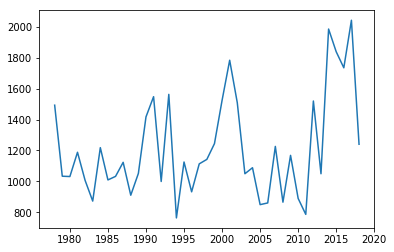

In [148]:
plt.plot(tabla_acum[(tabla_acum.index.isin(['All',2019]))==False]) 

In [0]:
tabla_acum = tabla_acum[(tabla_acum.index.isin(['All',2019]))==False] 

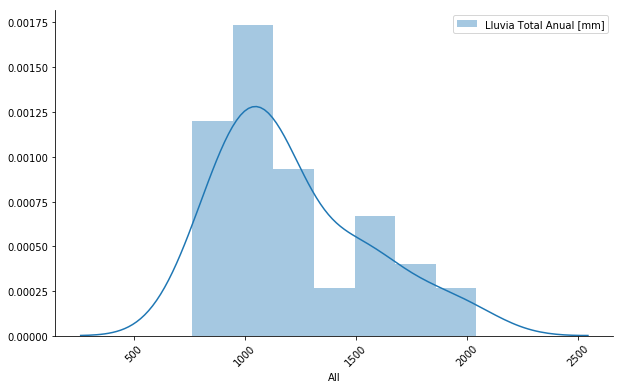

In [150]:
plt.figure(figsize=(10,6))
sb.distplot(tabla_acum['All'], bins=7, label='Lluvia Total Anual [mm]')
plt.xticks(rotation=45)
plt.legend()
sb.despine()

In [218]:
x1 = tabla_acum.All
m1 = x1.mean()
s1 = x1.std()
l1 = len(x1)

stats.kstest(x1, 'norm', args=(m1, s1), N=l1)

KstestResult(statistic=0.17275048293810236, pvalue=0.15367932241354818)

Como los p-valores obtenidos son menores que el nivel de significancia (alpha = 0.05), concluimos que podemos rechazar la hipótesis nula que establece que la variable lluvia total anual sigue una distribución normal. (ESTABA MAL HECHO EL KTEST)

In [212]:
x         = tabla_acum.All.values
media     = x.mean()
std       = x.std()
zstandar  = (x-media)/std

stats.kstest(zstandar,'norm')

KstestResult(statistic=0.17232216416637558, pvalue=0.15561374628215202)

In [0]:
#!pip install -U scikit-learn
#!pip install -U scikit-plot

Bajo un 5% de significancia, no se puede rechazar la hipótesis nula. Dado que el KS en pequeño 

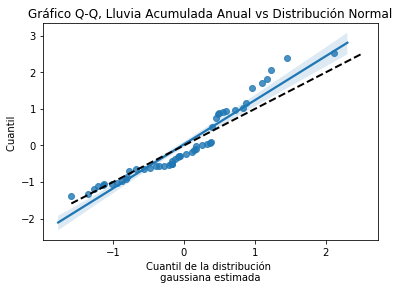

In [216]:
x        = tabla_acum.All.values
media    = x.mean()
std      = x.std()

zstadar  = (x-media)/std
variable  = zstadar
mu, sigma = stats.norm.fit(variable)
norm_dist = stats.norm(mu, sigma)
muestra   = norm_dist.rvs(10000)

percentiles         = np.linspace(0,100,51)  
qn_cuantiles        = np.percentile(variable, percentiles)
qn_cuantiles_normal = np.percentile(norm_dist.rvs(len(variable)), percentiles)

sb.regplot(x=qn_cuantiles_normal, y=qn_cuantiles)
plt.ylabel('Cuantil ')
plt.xlabel('Cuantil de la distribución \n gaussiana estimada ')
plt.title('Gráfico Q-Q, Lluvia Acumulada Anual vs Distribución Normal')

x = np.linspace(np.min((qn_cuantiles.min(), qn_cuantiles_normal.min())), np.max((qn_cuantiles.max(),qn_cuantiles_normal.max())))
plt.plot(x,x, color='black', ls="--",lw=2)

In [152]:
tabla_acum['año']=tabla_acum.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [158]:
tabla_acum.año = tabla_acum.año.astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [159]:
tabla_acum.dtypes

mes
All      int64
año    float64
dtype: object

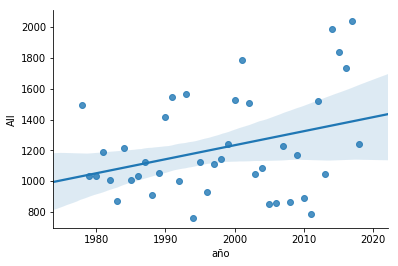

In [160]:
sb.regplot(x='año', y='All', data=tabla_acum)
sb.despine()

In [0]:
# con ceros

#fig = plt.figure(figsize=(20,20))
#meses=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
#for i in range(13):
#  if i==0: continue
#  ax=fig.add_subplot(4,3,i)
#  sb.distplot(sumas[sumas[i]<sumas_stats.loc['bigSup'][i]][i], bins=7, label=meses[i-1])
#  plt.xticks(rotation=45)
#  plt.legend()
#  sb.despine()
  

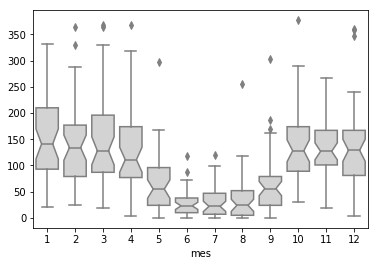

In [328]:
sb.boxplot(data=sumas_short,notch=True,color='lightgray')

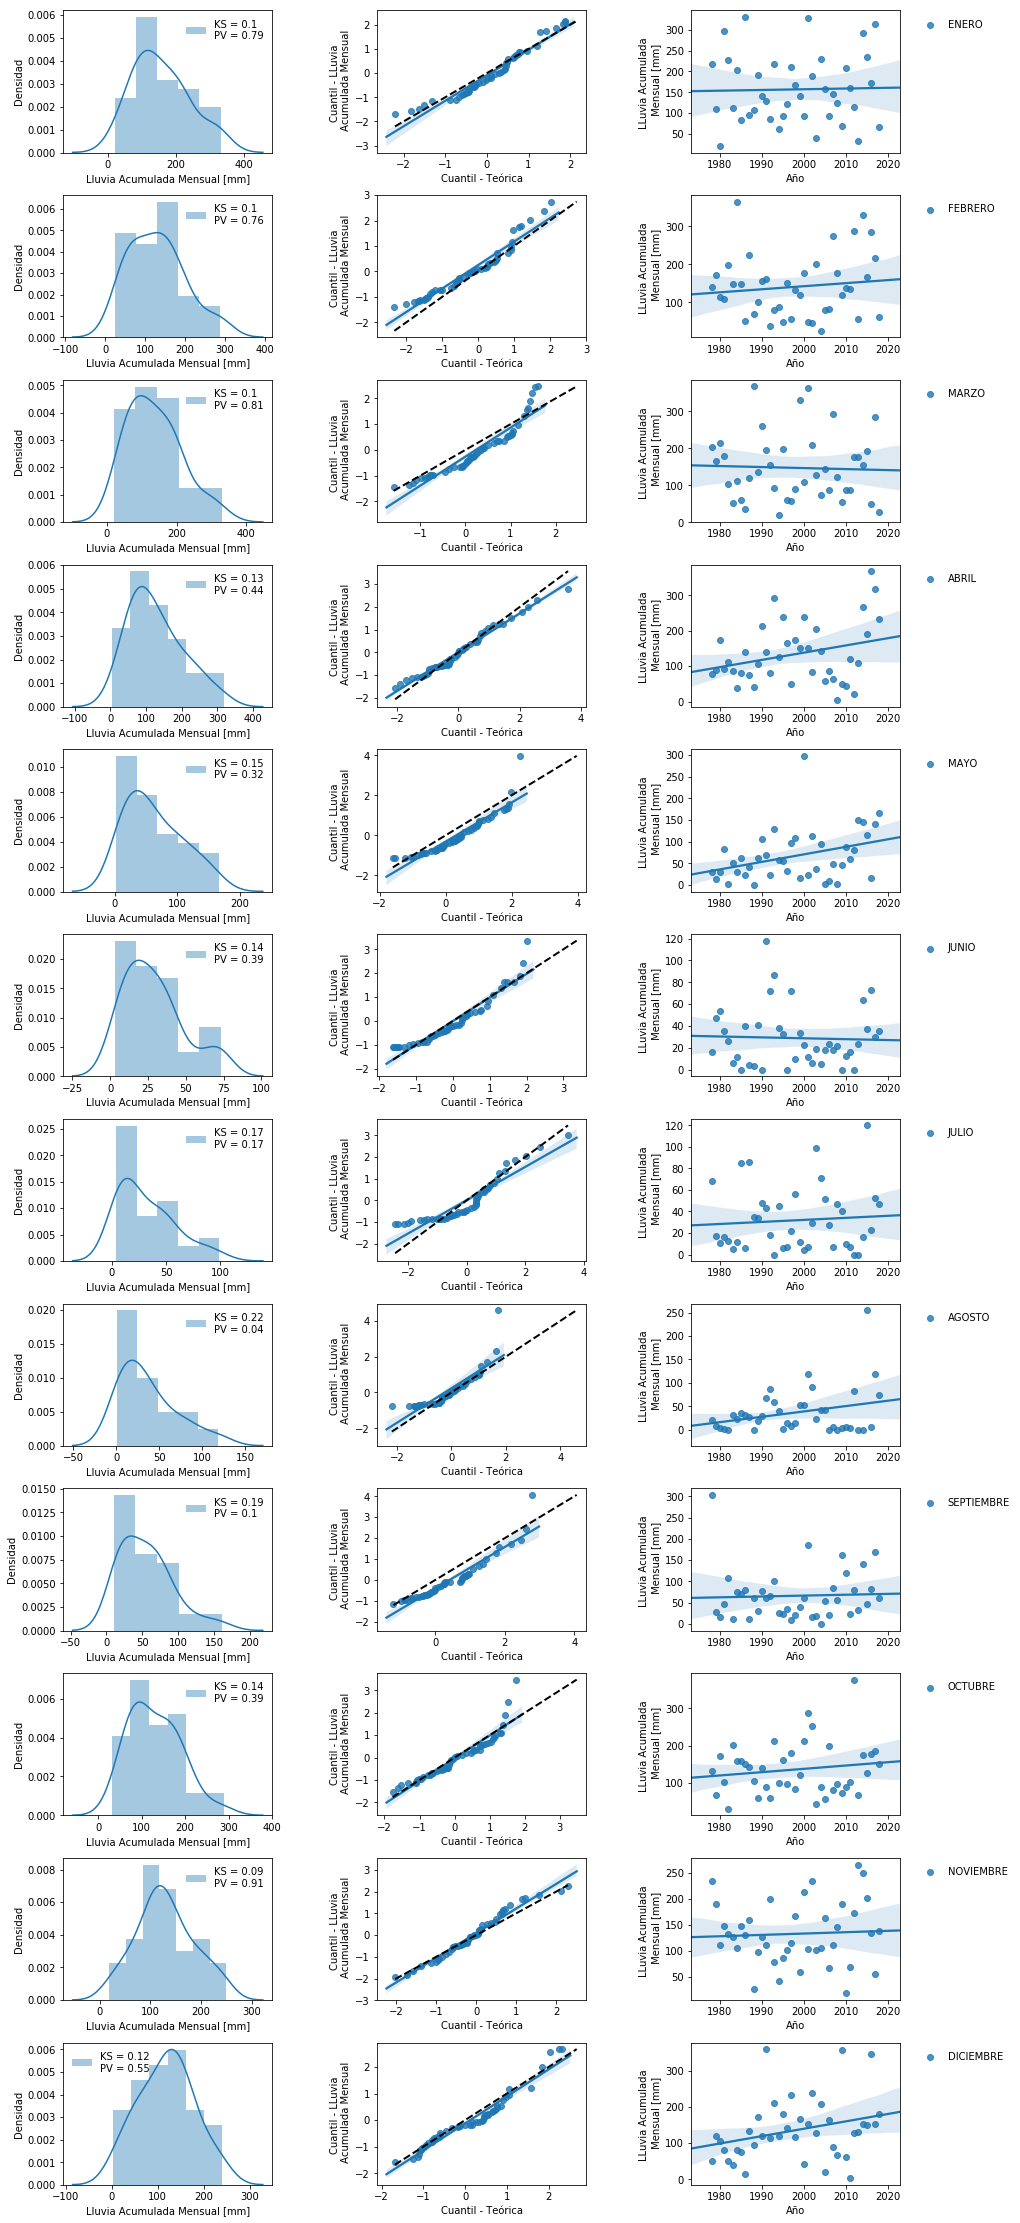

In [334]:
ktestXmes=[]
fig = plt.figure(figsize=(15,40))
meses=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
p=0
for i in range(13):
  if i==0: continue
    
  x        = sumas_short[i].values
  media    = x.mean()
  std      = x.std()
  zstadar  = (x-media)/std
  ks       = stats.kstest(zstadar, 'norm')
  ktestXmes.append(ks)
  
  p+=1
  ax=fig.add_subplot(12,3,p)
  sb.distplot(sumas_short[(sumas_short[i]<sumas_stats.loc['bigSup'][i])&(sumas_short[i]!=0)][i], 
              label='KS = '+str(round(ks[0],2))+'\nPV = '+str(round(ks[1],2)))
  plt.legend(frameon=False)
  plt.xlabel('Lluvia Acumulada Mensual [mm]')
  plt.ylabel('Densidad')

  
  p+=1
  ax=fig.add_subplot(12,3,p)
  variable  = zstadar
  mu, sigma = stats.norm.fit(variable)
  norm_dist = stats.norm(mu, sigma)
  muestra   = norm_dist.rvs(10000)
  percentiles         = np.linspace(0,100,51)  
  qn_cuantiles        = np.percentile(variable, percentiles)
  qn_cuantiles_normal = np.percentile(norm_dist.rvs(len(variable)), percentiles)
  sb.regplot(x=qn_cuantiles_normal, y=qn_cuantiles, label=meses[i-1])
  plt.ylabel('Cuantil - LLuvia \n Acumulada Mensual')
  plt.xlabel('Cuantil - Teórica')
  #plt.title('Gráfico Q-Q, Lluvia Acumulada Anual vs Distribución Normal')
  
  x = np.linspace(np.min((qn_cuantiles.min(), qn_cuantiles_normal.min())), np.max((qn_cuantiles.max(),qn_cuantiles_normal.max())))
  plt.plot(x,x, color='black', ls="--",lw=2)
  #plt.legend(frameon=False)
  
  p+=1
  ax=fig.add_subplot(12,3,p)
  sb.regplot(x='año',y=str(i),data=pd.DataFrame(sumas_short.loc(axis=1)[i]).reset_index().rename(columns=lambda x: str(x)),label=meses[i-1])
  plt.legend(frameon=False,bbox_to_anchor=(1.05, 1), loc=2)
  plt.ylabel('LLuvia Acumulada \n Mensual [mm]')
  plt.xlabel('Año')
  
  
  
fig.subplots_adjust(wspace=0.5, hspace=0.3)

In [0]:
#fig = plt.figure(figsize=(20,20))
#meses=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
#for i in range(13):
#  if i==0: continue
#  ax=fig.add_subplot(4,3,i)
#  x = sumas_short[i].values
#  media    = x.mean()
#  std      = x.std()
#  zstadar  = (x-media)/std
#  variable  = zstadar
#  mu, sigma = stats.norm.fit(variable)
#  norm_dist = stats.norm(mu, sigma)
#  muestra   = norm_dist.rvs(10000)
#  
#  percentiles         = np.linspace(0,100,51)  
#  qn_cuantiles        = np.percentile(variable, percentiles)
#  qn_cuantiles_normal = np.percentile(norm_dist.rvs(len(variable)), percentiles)
#  
#  sb.regplot(x=qn_cuantiles_normal, y=qn_cuantiles)
#  #plt.ylabel('Cuantil ')
#  #plt.xlabel('Cuantil de la distribución \n gaussiana estimada ')
#  #plt.title('Gráfico Q-Q, Lluvia Acumulada Anual vs Distribución Normal')
  
#  x = np.linspace(np.min((qn_cuantiles.min(), qn_cuantiles_normal.min())), np.max((qn_cuantiles.max(),qn_cuantiles_normal.max())))
#  plt.plot(x,x, color='black', ls="--",lw=2)

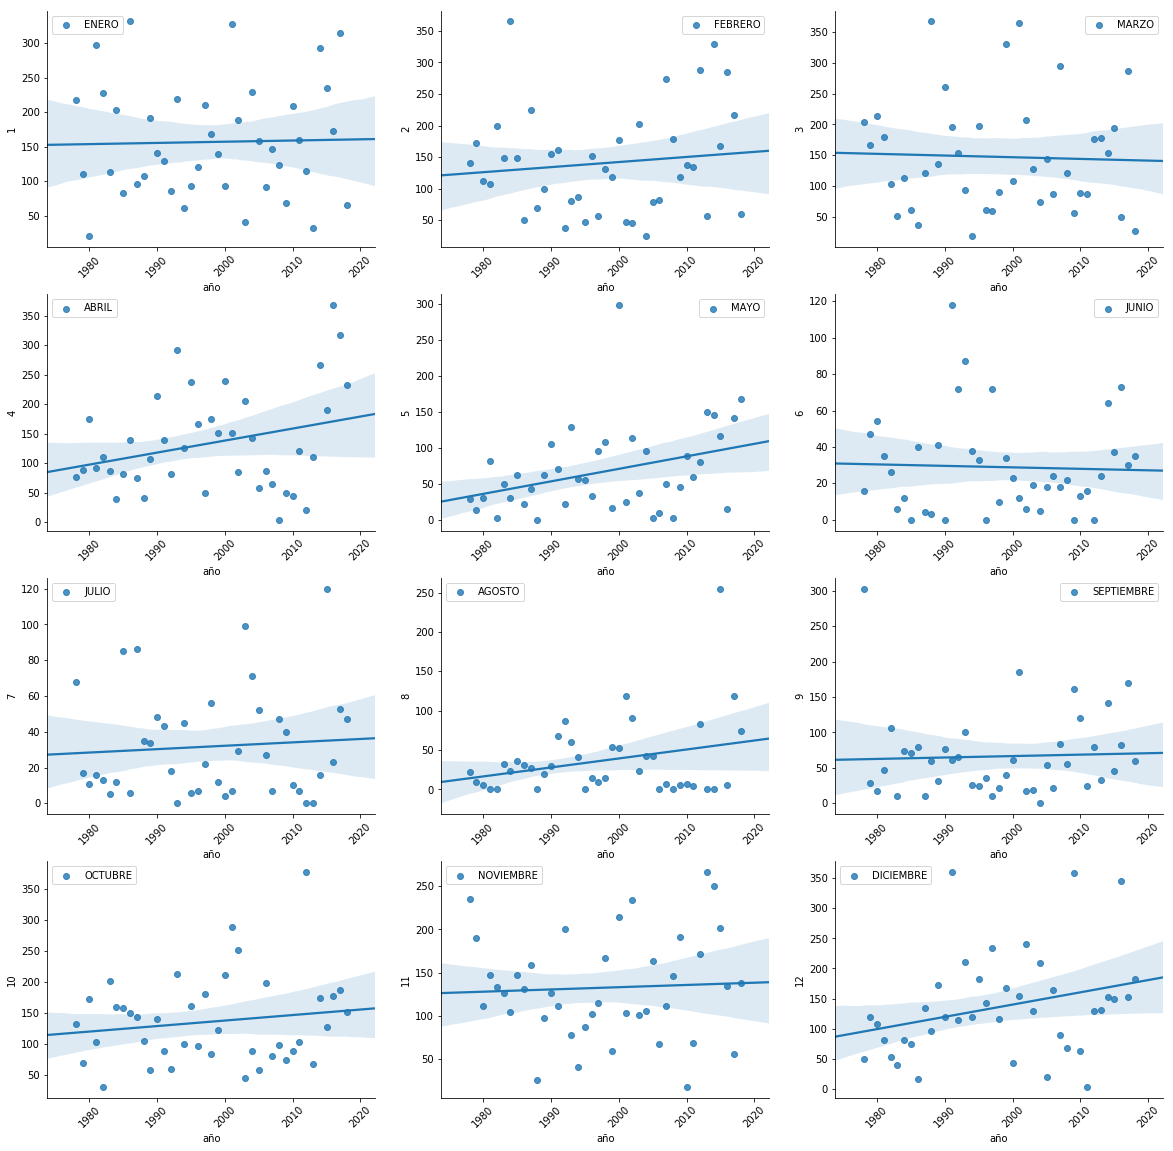

In [290]:
fig = plt.figure(figsize=(20,20))
meses=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
for i in range(13):
  if i==0: continue
  ax=fig.add_subplot(4,3,i)
  sb.regplot(x='año',y=str(i),data=pd.DataFrame(sumas_short.loc(axis=1)[i]).reset_index().rename(columns=lambda x: str(x)),label=meses[i-1])
  plt.xticks(rotation=45)
  plt.legend()
  sb.despine()

In [0]:
sumas_short.index = sumas_short.index.astype(float)
sumas_shortb=sumas_short.reset_index()

In [266]:
sumas_short.loc(axis=1)[1]

año
1978.0    217.0
1979.0    110.0
1980.0     21.0
1981.0    297.0
1982.0    228.0
1983.0    113.0
1984.0    203.0
1985.0     83.0
1986.0    331.0
1987.0     96.0
1988.0    108.0
1989.0    191.0
1990.0    141.0
1991.0    130.0
1992.0     86.0
1993.0    219.0
1994.0     62.0
1995.0     93.0
1996.0    121.0
1997.0    210.0
1998.0    168.0
1999.0    140.0
2000.0     93.0
2001.0    328.0
2002.0    188.0
2003.0     41.0
2004.0    229.0
2005.0    158.0
2006.0     92.0
2007.0    147.0
2008.0    123.0
2009.0     69.0
2010.0    209.0
2011.0    160.0
2012.0    115.0
2013.0     33.0
2014.0    293.0
2015.0    235.0
2016.0    173.0
2017.0    314.0
2018.0     66.0
Name: 1, dtype: float64

In [262]:
sumas_shortb

mes,año,1,2,3,4,5,6,7,8,9,10,11,12
0,1978.0,217.0,140.0,204.0,77.0,29.0,16.0,68.0,22.0,303.0,132.0,235.0,50.0
1,1979.0,110.0,173.0,166.0,89.0,14.0,47.0,17.0,9.0,29.0,69.0,190.0,120.0
2,1980.0,21.0,113.0,214.0,174.0,30.0,54.0,11.0,5.0,17.0,173.0,112.0,107.0
3,1981.0,297.0,108.0,179.0,92.0,82.0,35.0,16.0,1.0,47.0,103.0,147.0,81.0
4,1982.0,228.0,199.0,103.0,111.0,3.0,26.0,13.0,0.0,107.0,31.0,133.0,52.0
5,1983.0,113.0,148.0,52.0,86.0,50.0,6.0,5.0,32.0,11.0,202.0,127.0,40.0
6,1984.0,203.0,365.0,113.0,39.0,30.0,12.0,12.0,24.0,74.0,160.0,105.0,81.0
7,1985.0,83.0,149.0,61.0,82.0,62.0,0.0,85.0,36.0,71.0,158.0,147.0,75.0
8,1986.0,331.0,50.0,37.0,139.0,22.0,40.0,6.0,31.0,79.0,150.0,131.0,16.0
9,1987.0,96.0,224.0,121.0,75.0,42.0,4.0,86.0,27.0,11.0,144.0,159.0,134.0


In [280]:
pd.DataFrame(sumas_short.loc(axis=1)[1].reset_index()).columns

Index(['año', 1], dtype='object')

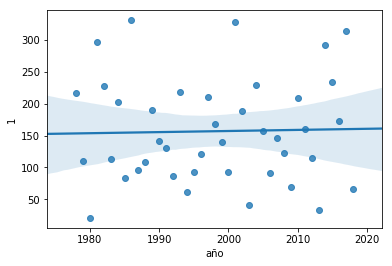

In [287]:
sb.regplot(x='año',y='1',data=pd.DataFrame(sumas_short.loc(axis=1)[1]).reset_index().rename(columns=lambda x: str(x)))

In [0]:
plt.plot(acumuladas[],)

In [0]:
sumas.describe()

In [0]:
paleta = sb.light_palette((210, 90, 60), input="husl")
c4='#56cbf9'
c2='#e9ebf8'
c5='#f8f8f8'
c1='#30343f'
c3='#272d2d'
plt.figure(figsize=(12,8))
menor=2000
mayor=2017

sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,notch=True,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)

In [0]:
fig = plt.figure(figsize=(20,8))


ax = fig.add_subplot(221)
menor=1978
mayor=1988
sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)

ax = fig.add_subplot(222)
menor=1988
mayor=1998
sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)

ax = fig.add_subplot(223)
menor=1998
mayor=2008
sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)


ax = fig.add_subplot(224)
menor=2008
mayor=2018
sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)




In [0]:
medianas = []
bigInfs  = []
bigSups  = []

for i in range(4):
  añoInicial=1978+i*10
  añoFinal=añoInicial+9
  #print(añoInicial,añoFinal)
  subTabla = sumas[(sumas.index<=añoFinal)&(sumas.index>=añoInicial)]
  describeST = subTabla.describe()
  #print(subTabla.describe())
  describeST.loc['bigInf'] = describeST.loc['25%']-(describeST.loc['75%']-describeST.loc['25%'])*1.5
  describeST.loc['bigSup'] = describeST.loc['75%']+(describeST.loc['75%']-describeST.loc['25%'])*1.5
  medianas.append(describeST.loc['50%'])
  bigInfs.append(describeST.loc['bigInf'])
  bigSups.append(describeST.loc['bigSup']) 
  print(describeST)
  

In [0]:
for i in range(4):
  plt.plot(medianas[i],label='década: '+str(i+1))
plt.legend()

In [0]:
lluvias[]

In [0]:
lluvias[lluvias.rain!=0].groupby('rain').rain.count()

In [0]:
lluvias[(lluvias.rain<100)&(lluvias.rain>=0)].rain.hist(bins=10)

In [0]:
for i in range(4)

In [0]:

for i in range(3):
  plt.plot(sumas[(sumas.index<=mayor)&(sumas.index>=menor)].index.values,sumas[(sumas.index<=mayor)&(sumas.index>=menor)][i+8].values,label=i+8)
plt.legend() 

In [0]:
for i in range(5):
  if i ==0:
    continue
  

In [0]:
sb.qq

In [0]:
from scipy import stats

x1 = lluvias[lluvias['rain'].notnull()]

##Calculamos la "skewness"

skew = stats.skew(x1)

#print(x1.mean()) # => 3.332
#print(x1.std()) # => 11.452
#print(len(x1)) # => 45034

m1=3.331914
s1=11.451975
l1=15034.00

stats.kstest(x1, 'norm', args=(m1, s1), N=l1)
